Targets reached at depth 0 : 1
          0
OnOff     ?
OnGreen   ?
OnYellow  ?
OnRed     ?
Daytime   ?


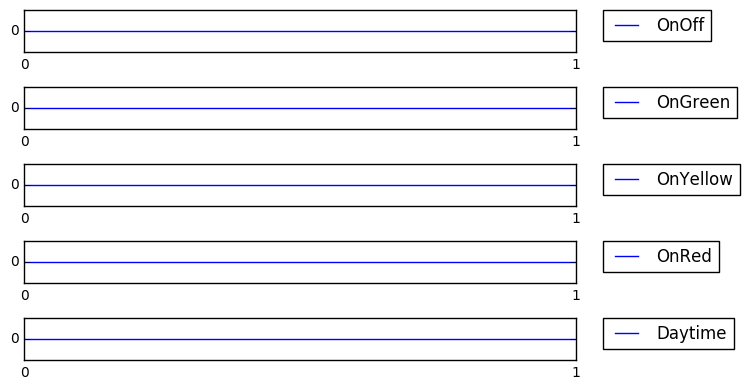

Targets reached at depth 1 : 1
              0     1
OnOff         ?     ?
OnGreen       ?     ?
OnYellow  false  true
OnRed         ?     ?
Daytime   false     ?


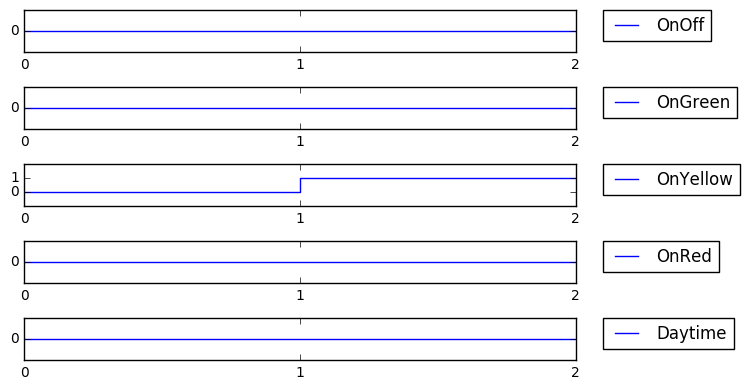

Targets reached at depth 2 : 1
          0      1     2
OnOff     ?      ?     ?
OnGreen   ?      ?     ?
OnYellow  ?  false  true
OnRed     ?      ?     ?
Daytime   ?  false     ?


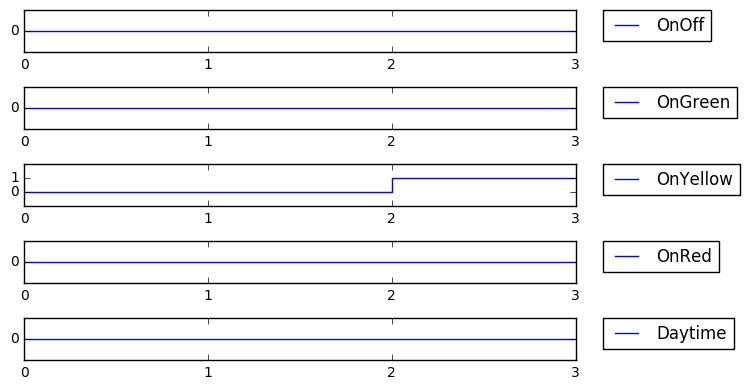

Targets reached at depth 3 : 1
              0      1      2      3
OnOff         ?      ?      ?      ?
OnGreen       ?      ?  false   true
OnYellow  false   true      ?      ?
OnRed         ?  false   true  false
Daytime   false   true   true      ?


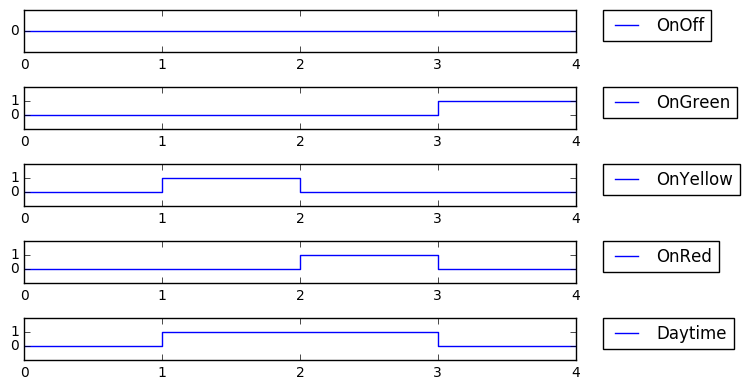

In [1]:
import intrepid as ip
import intrepid.utils
import intrepid.plots
import traffic_light

ctx = ip.mk_ctx()

myTrafficLight = traffic_light.SimulinkCircuit(ctx, 'MyTrafficLight')
myTrafficLight.mk_circuit()

lightOut = myTrafficLight.outputs['traffic_light/out']
targetGreen = ip.mk_eq(ctx, lightOut, myTrafficLight.nets['traffic_light/Green'])
targetYellow = ip.mk_eq(ctx, lightOut, myTrafficLight.nets['traffic_light/Yellow'])
targetRed = ip.mk_eq(ctx, lightOut, myTrafficLight.nets['traffic_light/Red'])
targetOff = ip.mk_eq(ctx, lightOut, myTrafficLight.nets['traffic_light/Off'])

bmc = ip.mk_engine_bmc(ctx)
ip.bmc_add_target(ctx, bmc, targetGreen)
ip.bmc_add_target(ctx, bmc, targetYellow)
ip.bmc_add_target(ctx, bmc, targetRed)
ip.bmc_add_target(ctx, bmc, targetOff)

for depth in range(4):
    reachedTargets = ip.utils.bmc_reach_at_depth(ctx, bmc, depth)
    if len(reachedTargets) > 0:
        print 'Targets reached at depth', depth, ':', len(reachedTargets)
        cex = ip.bmc_get_counterexample(ctx, bmc, reachedTargets[0])
        cexDict = ip.utils.counterexample_get_as_dictionary(ctx, cex, myTrafficLight.inputs, {})
        df = ip.utils.counterexample_get_as_dataframe(cexDict)
        print df
        ip.plots.plot_counterexample_dictionary(cexDict)
    else:
        print 'No target reacheable at depth:', depth

ip.del_ctx(ctx)